# Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collecting and Processing

In [2]:
gold_data = pd.read_csv(r'C:\Users\gunas\Downloads\gld_price_data.csv')

In [3]:
gold_data.head(10)

,Date,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180000,1414.65,618.85,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285000,1420.25,623.65,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167000,1411.10,608.80,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053000,1434.75,626.65,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590000,1429.05,635.90,1.557099
5,01-09-2008,1409.130005,86.550003,75.250000,15.520000,1425.90,652.45,1.466405
6,01-10-2008,1420.329956,88.250000,74.019997,16.061001,1426.45,665.55,1.480100
7,01-11-2008,1401.020020,88.580002,73.089996,16.077000,1438.55,663.00,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1386.80,638.80,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1379.00,631.60,1.480210


In [4]:
gold_data['PLT_Price']=gold_data.PLT_Price/10
gold_data['PLD_Price']=gold_data.PLD_Price/10

In [5]:
gold_data

,Date,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,141.465,61.885,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,142.025,62.365,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,141.110,60.880,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,143.475,62.665,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,142.905,63.590,1.557099
...,...,...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,148.085,82.795,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,147.235,81.210,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,146.895,81.575,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,147.315,81.635,1.193118


In [6]:
gold_data.tail()

,Date,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,148.085,82.795,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,147.235,81.210,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,146.895,81.575,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,147.315,81.635,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,147.090,82.750,1.182033


In [7]:
gold_data.shape

(2290, 8)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2290 non-null   object 
 1   SPX        2290 non-null   float64
 2   GOLD       2290 non-null   float64
 3   USO        2290 non-null   float64
 4   SILVER     2290 non-null   float64
 5   PLT_Price  2290 non-null   float64
 6   PLD_Price  2290 non-null   float64
 7   EUR/USD    2290 non-null   float64
dtypes: float64(7), object(1)
memory usage: 143.2+ KB


In [9]:
gold_data.isnull().sum()

Date         0
SPX          0
GOLD         0
USO          0
SILVER       0
PLT_Price    0
PLD_Price    0
EUR/USD      0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,126.579240,74.943657,1.283653
std,519.111540,23.283346,19.523517,7.092566,28.040652,13.535619,0.131547
min,676.530029,70.000000,7.960000,8.850000,77.560000,47.045000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,97.503750,65.816250,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,138.725000,73.317500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,148.687500,80.061250,1.369971
max,2872.870117,184.589996,117.480003,47.259998,173.780000,119.750000,1.598798


In [11]:
gold_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GOLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SILVER,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
PLT_Price,2290.0,126.579240,28.040652,77.560000,97.503750,138.725000,148.687500,173.780000
PLD_Price,2290.0,74.943657,13.535619,47.045000,65.816250,73.317500,80.061250,119.750000
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


# Correlation
1.Positive
2.Negavtive

In [12]:
correlation = gold_data.corr()

<AxesSubplot:>

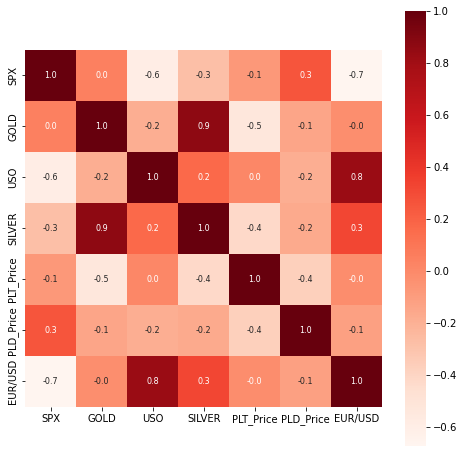

In [13]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [14]:
X=gold_data.drop(['GOLD'],axis=1)
X=X.drop(['SPX'],axis=1)

<AxesSubplot:title={'center':'Correlation with GOLD'}>

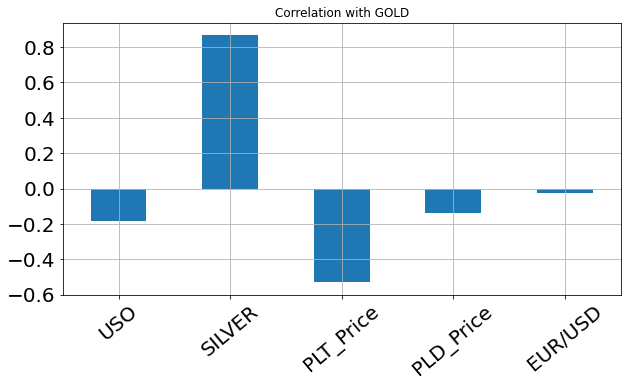

In [15]:
X.corrwith(gold_data['GOLD']).plot.bar(
        figsize = (10, 5), title = "Correlation with GOLD", fontsize = 20,
        rot = 40, grid = True)

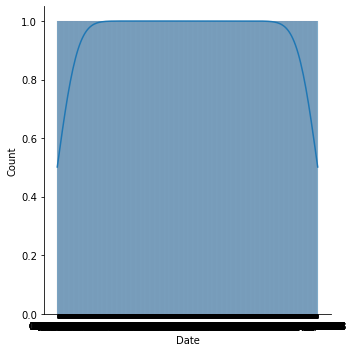

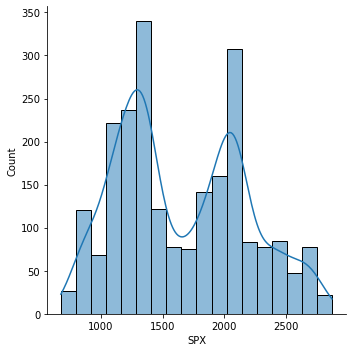

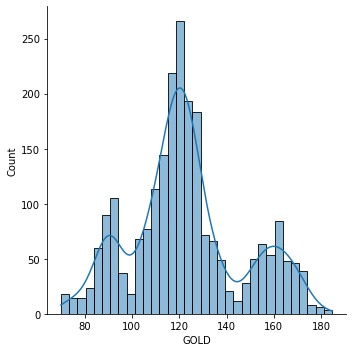

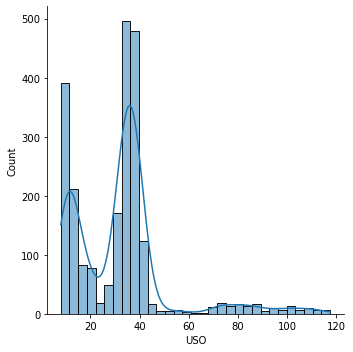

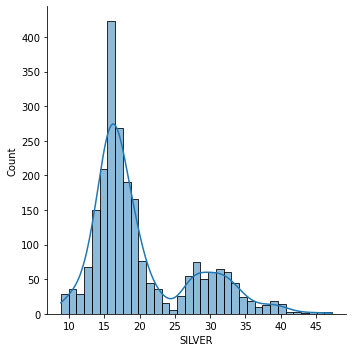

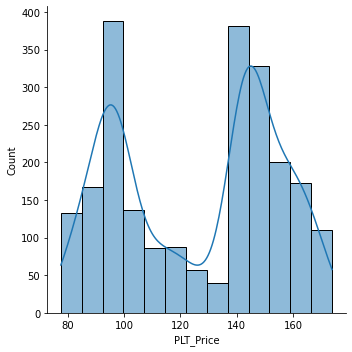

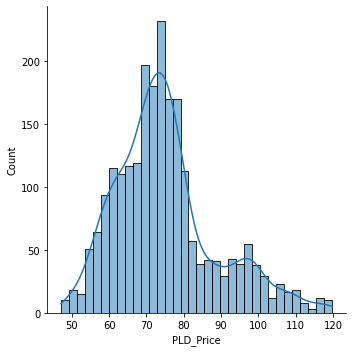

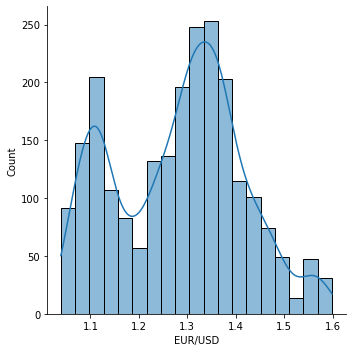

In [16]:
for col in gold_data.columns:
    sns.displot(gold_data[col],kde=True);

<Figure size 432x288 with 0 Axes>

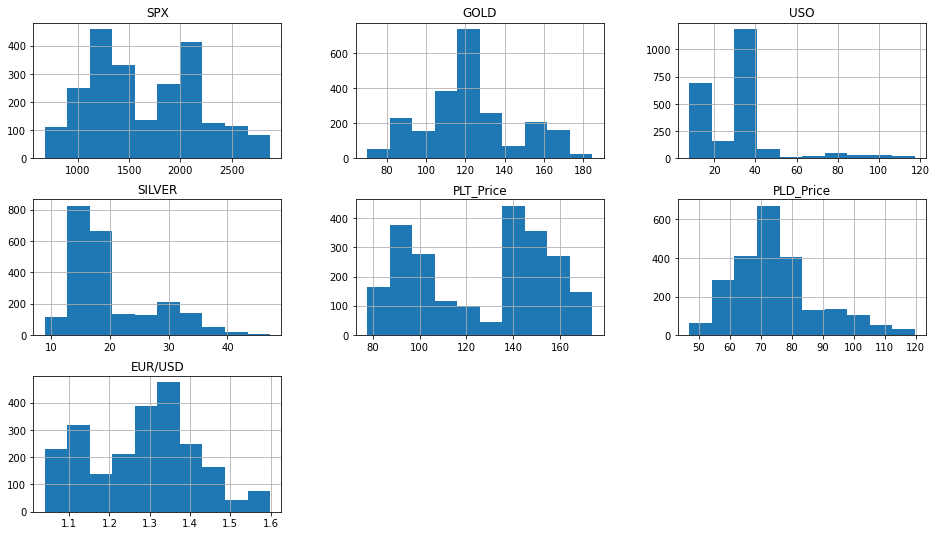

In [17]:
plt.figure()
gold_data.hist(figsize=(16,9));

<AxesSubplot:xlabel='SPX', ylabel='GOLD'>

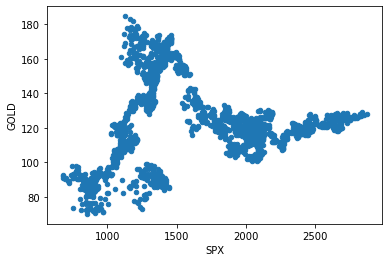

In [18]:
gold_data.plot(kind='scatter', x='SPX', y='GOLD')

<AxesSubplot:xlabel='USO', ylabel='GOLD'>

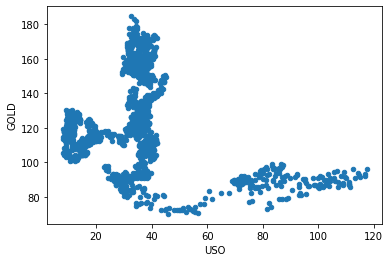

In [19]:
gold_data.plot(kind='scatter', x='USO', y='GOLD')

<AxesSubplot:xlabel='SILVER', ylabel='GOLD'>

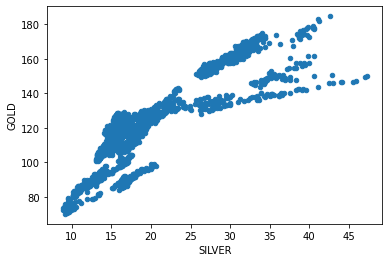

In [20]:
gold_data.plot(kind='scatter', x='SILVER', y='GOLD')

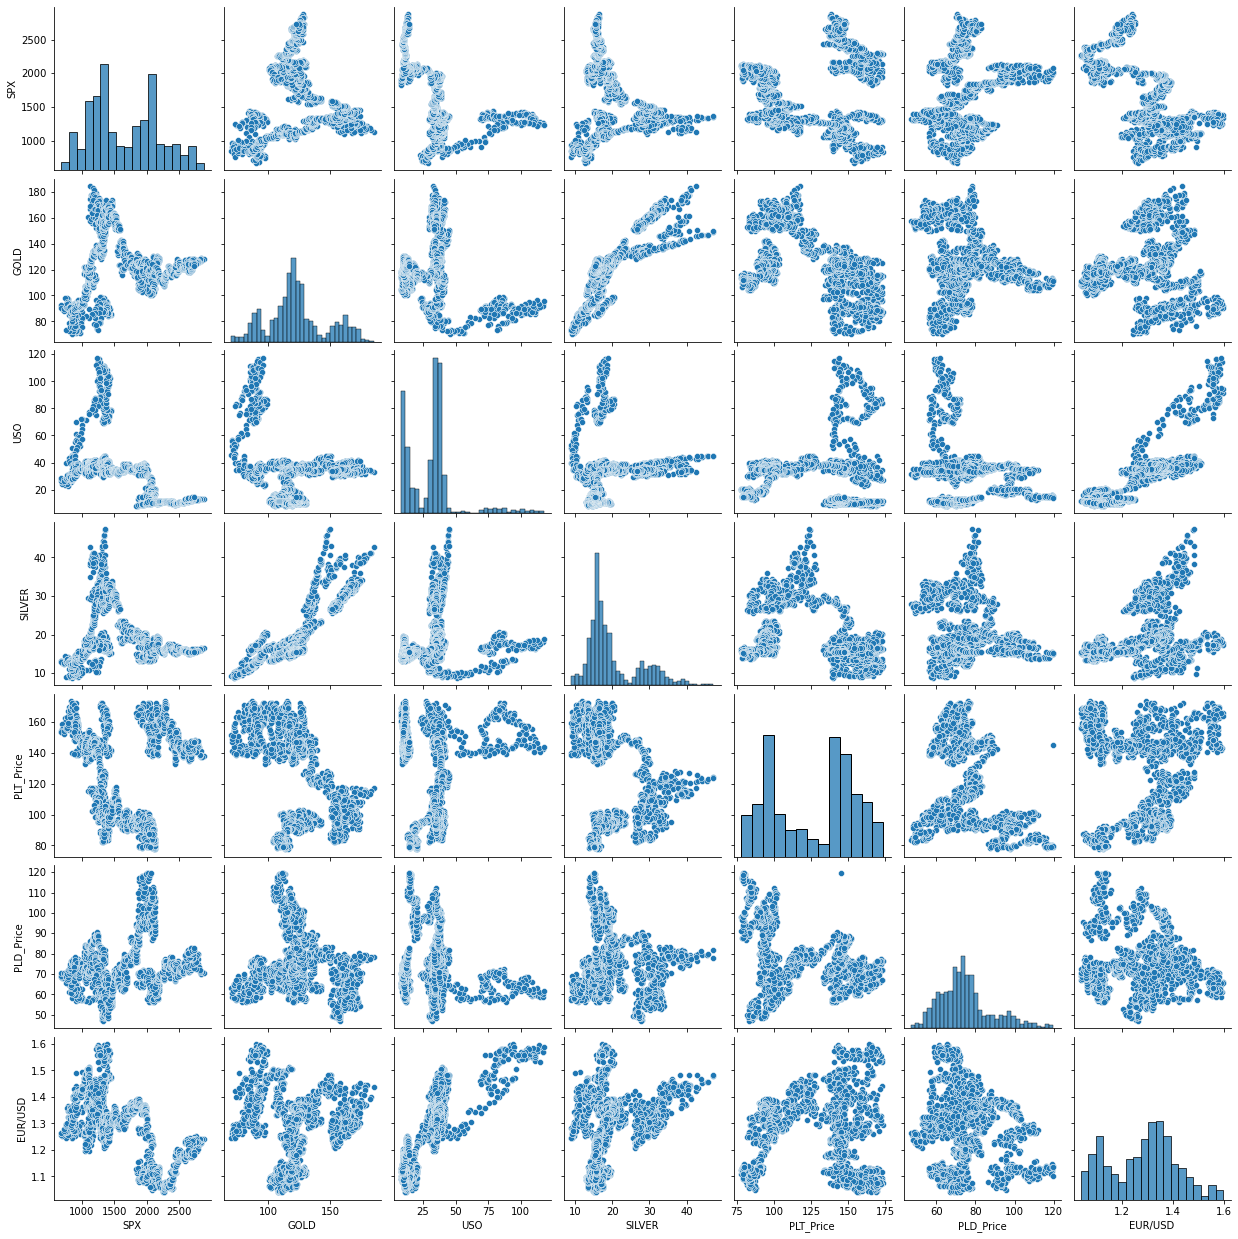

In [21]:
sns.pairplot(data=gold_data)

<AxesSubplot:>

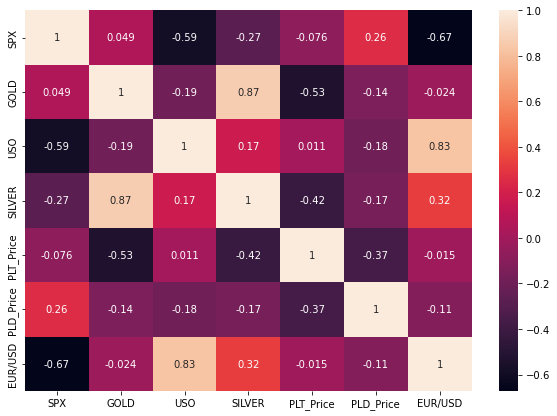

In [22]:
plt.figure(figsize=(10,7)) 
sns.heatmap(gold_data.corr(), annot=True) 

In [23]:
print(correlation['GOLD'])

SPX          0.049345
GOLD         1.000000
USO         -0.186360
SILVER       0.866632
PLT_Price   -0.531433
PLD_Price   -0.136915
EUR/USD     -0.024375
Name: GOLD, dtype: float64


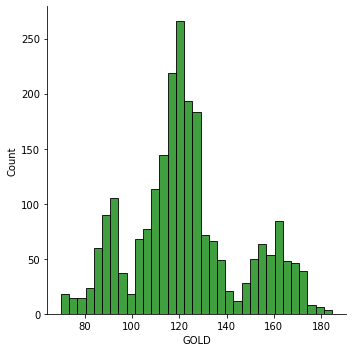

In [24]:
sns.displot(gold_data['GOLD'], color='green')

# Split the data into target values and feature values :

In [25]:
X = gold_data.drop(['Date', 'GOLD'], axis=1)
Y = gold_data['GOLD']

In [26]:
print(X)

              SPX        USO   SILVER  PLT_Price  PLD_Price   EUR/USD
0     1447.160034  78.470001  15.1800    141.465     61.885  1.471692
1     1447.160034  78.370003  15.2850    142.025     62.365  1.474491
2     1411.630005  77.309998  15.1670    141.110     60.880  1.475492
3     1416.180054  75.500000  15.0530    143.475     62.665  1.468299
4     1390.189941  76.059998  15.5900    142.905     63.590  1.557099
...           ...        ...      ...        ...        ...       ...
2285  2671.919922  14.060000  15.5100    148.085     82.795  1.186789
2286  2697.790039  14.370000  15.5300    147.235     81.210  1.184722
2287  2723.070068  14.410000  15.7400    146.895     81.575  1.191753
2288  2730.129883  14.380000  15.5600    147.315     81.635  1.193118
2289  2725.780029  14.405800  15.4542    147.090     82.750  1.182033

[2290 rows x 6 columns]


# Splitting X and Y into training and testing variables : 

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model Training: Random Forest Regressor : 

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor

RandomForestRegressor()

In [30]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
test_data_prediction = regressor.predict(X_test)

In [32]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.9948997137013965
Mean Absolute Error :  1.0831066352620036
Mean squared error :  2.6901128596709856
Root Mean squared error :  1.640156352202736


In [33]:
print(test_data_prediction)

[168.9825986   82.55229944 116.20510026 127.37730115 120.18060123
 154.93209761 150.59719723 126.44370065 117.40309877 125.91000011
 116.57590076 170.60700085 141.52170027 167.99239819 114.80290008
 117.83700106 134.06110164 170.70090137 160.41110415 172.06320027
 154.93810002 124.64219996 173.73919869 157.84960208 125.11880069
  94.40710013  77.77949983 120.2836998  119.21069999 167.45419788
  87.92380193 124.98670025  90.65990051 117.58310044 121.26739922
 135.6024999  115.61230083 114.24530049 134.91380096 107.87530095
 103.65740167  87.43229841 126.46910101 117.58650043 156.81660034
 119.72310012 108.59439904 108.04879938  93.2521001  126.92419816
  74.85670024 114.05749922 121.38060051 111.40440046 118.81799877
 120.30829919 160.88770006 172.1701012  147.19659688  85.82649883
  93.94700053  86.88589844  90.33610088 119.01120051 126.37380046
 127.73679975 171.72179971 122.46579945 117.83359901  91.62190075
 168.25410134 142.56199856 131.11240307 121.07180146 121.8296995
 119.856001

In [34]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9948997137013965


In [35]:
Y_test = list(Y_test)

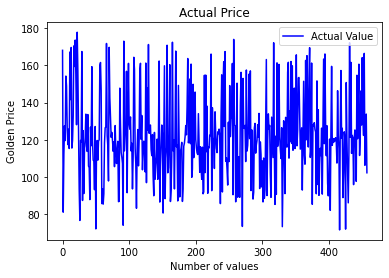

In [36]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()


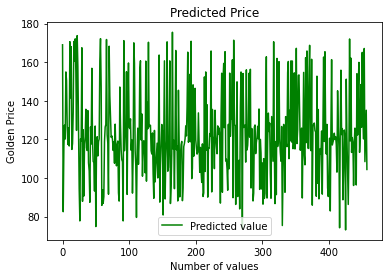

In [37]:
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Predicted Price') 
plt.xlabel('Number of values')
plt.ylabel('Golden Price') 
plt.legend() 
plt.show()

# comparing the actual prices vs predicted prices:

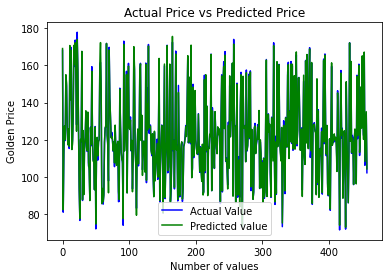

In [38]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()